# Prediction of Bond Strength 
# Experiment One: Train on 90% of the RBD-ACE2 WT Dataset and Evaluate the models on the remaining 10% of the Dataset

In [ ]:
#Import packages
#Loading the dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import pickle
df = pd.read_excel("/Users/mateen/Downloads/Data 2/allbonding-RBD-ACE2-WT.xlsx")

In [6]:
#!pip install ope

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 589.1 kB/s eta 0:00:00a 0:00:01
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
#Declaring the Feature Variable
X = df.drop(['Unnamed: 5','Unnamed: 15','Atom1','Atom2','Unnamed: 25','BO', "Atom2.1","Atom1.1"], axis=1)


In [3]:
#Declaring the Target Variable (Bond Order)
y = df["BO"]

In [4]:
#Dataset Splitting. Training (90%) Testing (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [5]:
X_test_copy = X_test.copy()

In [6]:
#Printing a sample of the dataset
X_test_copy

,bond,BL,Ele1,x1,y1,z1,PDBele1,AA1,SeqNo1,ChainN1,Ele2,x2,y2,z2,PDBele2,AA2,SeqNo2,ChainN2
5217,C-O,4.3466,C,13.151,31.112,17.350,C,VAL,59,A,O,11.842,28.931,20.874,O,GLU,57,A
6863,H-C,1.1018,H,33.252,42.985,55.840,HB,VAL,512,E,C,34.108,42.344,55.574,CB,VAL,512,E
10918,H-C,4.1226,H,18.336,58.465,32.207,HA,GLU,484,E,C,14.708,59.591,33.809,CA,VAL,483,E
14860,H-H,3.4469,H,35.633,30.517,50.986,HA,PHE,374,E,H,32.958,29.933,48.893,HB2,TRP,436,E
6440,H-C,1.0999,H,33.884,21.269,28.347,HA,TRP,328,A,C,33.809,21.686,29.362,CA,TRP,328,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19024,O...H,3.1826,H,45.387,34.265,64.407,H,LYS,386,E,O,46.818,31.793,65.811,O,THR,385,E
6390,H-C,1.0998,H,23.610,44.952,17.369,HD13,LEU,73,A,C,24.410,45.490,17.899,CD1,LEU,73,A
373,C-C,1.5239,C,24.061,48.072,34.972,CG,GLN,493,E,C,24.567,46.689,34.578,CD,GLN,493,E
5418,C-O,4.4920,C,46.336,34.555,66.288,CA,LYS,386,E,O,42.759,32.946,64.099,O,PRO,384,E


In [7]:
#Data Preprocessing (Label Encoding)
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
X['bond'] = label_encoder.fit_transform(X['bond'])
X['Ele1'] = label_encoder.fit_transform(X['Ele1'])
X['Ele2'] = label_encoder.fit_transform(X['Ele2'])
X['PDBele1'] = label_encoder.fit_transform(X['PDBele1'])
X['AA1'] = label_encoder.fit_transform(X['AA1'])
X['PDBele2'] = label_encoder.fit_transform(X['PDBele2'])
X['ChainN1'] = label_encoder.fit_transform(X['ChainN1'])
X['ChainN2'] = label_encoder.fit_transform(X['ChainN2'])
X['AA2'] = label_encoder.fit_transform(X['AA2'])

In [8]:
X

,bond,BL,Ele1,x1,y1,z1,PDBele1,AA1,SeqNo1,ChainN1,Ele2,x2,y2,z2,PDBele2,AA2,SeqNo2,ChainN2
0,0,1.3773,0,29.071,48.100,32.949,10,8,34,0,0,29.959,47.807,33.960,5,8,34,0
1,0,1.3783,0,36.312,21.408,29.838,10,17,328,0,0,37.123,22.339,30.450,4,17,328,0
2,0,1.3794,0,22.200,42.065,20.204,10,17,69,0,0,22.809,41.572,19.069,4,17,69,0
3,0,1.3801,0,31.489,31.071,49.933,10,17,436,1,0,30.418,30.264,49.608,4,17,436,1
4,0,1.3818,0,29.978,25.452,9.957,10,8,345,0,0,30.105,25.532,8.583,5,8,345,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25351,16,2.0325,4,25.872,18.327,13.556,79,4,344,0,4,27.172,18.300,15.119,80,4,361,0
25352,16,2.0375,4,41.696,37.089,59.275,79,4,379,1,4,40.166,38.206,60.023,80,4,432,1
25353,16,2.0375,4,30.886,36.126,69.106,79,4,336,1,4,29.666,37.373,70.159,80,4,361,1
25354,16,2.0388,4,20.540,63.728,34.067,79,4,480,1,4,20.257,63.480,32.063,80,4,488,1


In [11]:
len(X)

25356

In [9]:
y = df["BO"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
#Training the Decision Tree Regressor
regressor = DecisionTreeRegressor()
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['mse', 'mae']
}
grid_search = GridSearchCV(regressor, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)


In [47]:
print("Best parameters:", grid_search.best_params_)
print("Lowest RMSE: ", (-grid_search.best_score_)**(1/2.0))

Best parameters: {'criterion': 'mse', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10}
Lowest RMSE:  0.008451587582200491


In [ ]:
#Saving the best model
#best_params_dt = grid_search.best_params_
#best_estimator_dt = grid_search.best_estimator_
import pickle
#pickle.dump(best_estimator_dt, open('/Users/mateen/DT_wt2.pkl', 'wb'))

In [78]:
#Loading the model for Evaluation
pickled_model = pickle.load(open('/Users/mateen/DT_wt.pkl', 'rb'))
y_grid_dt = pickled_model.predict(X_test)

/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [79]:
#Evaluating the Decision Tree Model
true_mean = np.mean(y_test)
squared_error_num = np.sum(np.abs(y_test - y_grid_dt))
squared_error_den = np.sum(np.abs(y_test - true_mean))
rae_loss = squared_error_num / squared_error_den

mse = mean_squared_error(y_test,y_grid_dt)
mae = mean_absolute_error(y_test, y_grid_dt)
r2 = r2_score(y_test, y_grid_dt)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print(f"RAE: {rae_loss}")
print(f"RMSE: {rmse}")

Mean Squared Error: 8.982258082822609e-05
Mean Absolute Error: 0.003036134079889271
R-squared: 0.9963968530518658
RAE: 0.024726009948512147
RMSE: 0.009477477556197433


/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_exte

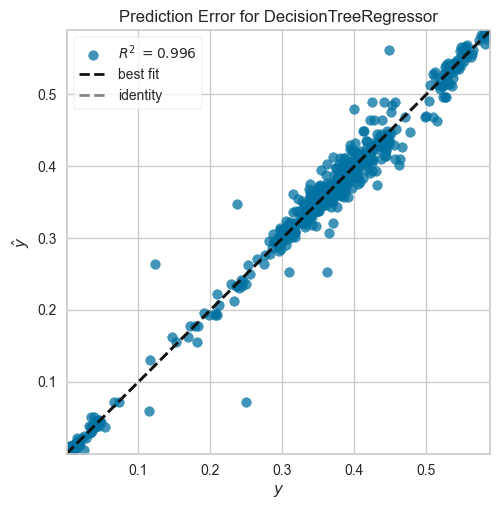

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [19]:
#Visualizing the model

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError


visualizer = PredictionError(pickled_model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 
#fig, ax = plt.subplots(figsize=(8, 6))
#visualizer.poof(outpath="DT_WT.png", show=False)
#plt.savefig("/Users/mateen/Desktop/AMIAA PODIUM/DT_WT.pdf" , dpi=300)
#plt.close()

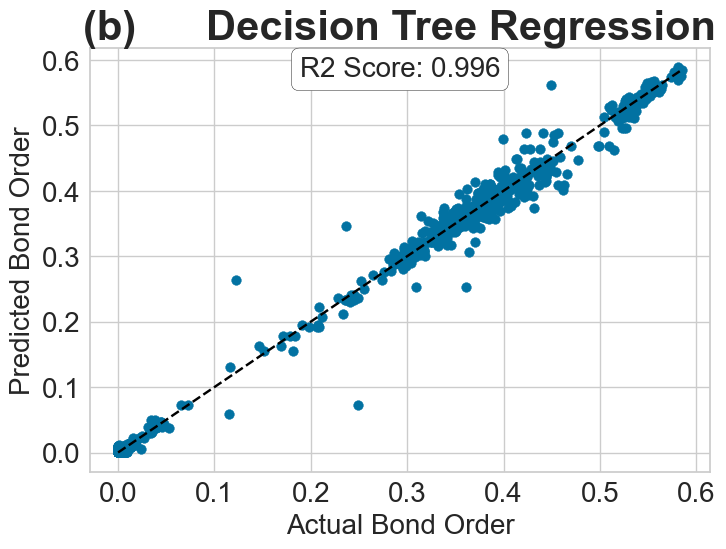

In [80]:
#Visualizing the Model
#plt.annotate(f"R-squared: {r2:.3f}", (0.7, 0.8), fontsize=12)

#plt.rcParams['font.size'] = 40 

#fig, ax = plt.subplots()
#plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_grid_dt)
#ax.set_xticklabels(ax.get_xticks(), fontsize=10)
#ax.set_xticklabels(ax.get_yticks(), fontsize=14)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#ax.scatter(y_test, y_grid_dt, s=40)

plt.annotate(f'R2 Score: {r2:.3f}', xy=(min(y_test), max(y_grid_dt)), xytext=(0.5, 0.95), textcoords='axes fraction', ha='center', va='center', fontsize=20, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', label='Line of Best Fit')


plt.xlabel('Actual Bond Order', fontsize=20)
plt.ylabel('Predicted Bond Order', fontsize=20)
plt.title('(b)      Decision Tree Regression', fontsize=30, weight='bold')
#plt.title('(a)           XGBoost Regression', fontsize=32, weight='bold')

plt.savefig("/Users/mateen/Desktop/AMIAA PODIUM/DT_WT.jpg" , dpi=800)
plt.show()



In [ ]:
# Training the KNN Regressor

from sklearn.neighbors import KNeighborsRegressor
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'],  
    'p': [1, 2],  
}


knn = KNeighborsRegressor()

# Create a GridSearchCV object with cross-validation 
grid_search_kn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)


grid_search_kn.fit(X_train, y_train)

# Get the best hyperparameters and the best estimator
#best_params_kn = grid_search_kn.best_params_
#best_estimator_kn = grid_search_kn.best_estimator_

# Saving the KNN Regressor

#pickle.dump(best_estimator_kn, open('/Users/mateen/KN_wt_new.pkl', 'wb'))

#y_grid_kn = best_estimator_kn.predict(X_test)

In [64]:
#Loading the KNN model
pickled_model = pickle.load(open('/Users/mateen/KN_wt.pkl', 'rb'))


/usr/local/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsRegressor from version 1.1.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [67]:
y_grid_kn = pickled_model.predict(X_test)

In [ ]:
#Evaluating the KNN Regressor
true_mean = np.mean(y_test)
squared_error_num = np.sum(np.abs(y_test - y_grid_kn))
squared_error_den = np.sum(np.abs(y_test - true_mean))
rae_loss = squared_error_num / squared_error_den

mse = mean_squared_error(y_test,y_grid_kn)
mae = mean_absolute_error(y_test, y_grid_kn)
r2 = r2_score(y_test, y_grid_kn)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print(f"RAE: {rae_loss}")
print(f"RMSE: {rmse}")

In [ ]:
#Training the XGB Regressor
from sklearn.model_selection import GridSearchCV
import xgboost as xg

params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgbr = xg.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params, cv= 10,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

# Get the best hyperparameters and the best estimator
best_params_clf = clf.best_params_
best_estimator_clf = clf.best_estimator_

# Use the best estimator to make predictions on the test set

pickle.dump(best_estimator_clf, open('/Users/mateen/XG_wt.pkl', 'wb'))

y_grid_XG = best_estimator_kn.predict(X_test)

In [81]:
#Loading the XGB Regressor
import pickle
pickled_model = pickle.load(open('/Users/mateen/XG_wt.pkl', 'rb'))
y_grid_XG = pickled_model.predict(X_test)

In [82]:
#Evaluating the XGB Regressor
true_mean = np.mean(y_test)
squared_error_num = np.sum(np.abs(y_test - y_grid_XG))
squared_error_den = np.sum(np.abs(y_test - true_mean))
rae_loss = squared_error_num / squared_error_den

mse = mean_squared_error(y_test,y_grid_XG)
mae = mean_absolute_error(y_test, y_grid_XG)
r2 = r2_score(y_test, y_grid_XG)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print(f"RAE: {rae_loss}")
print(f"RMSE: {rmse}")

Mean Squared Error: 6.510711250543444e-05
Mean Absolute Error: 0.003610086820035577
R-squared: 0.9973882904325092
RAE: 0.029400230779810525
RMSE: 0.008068897849485668


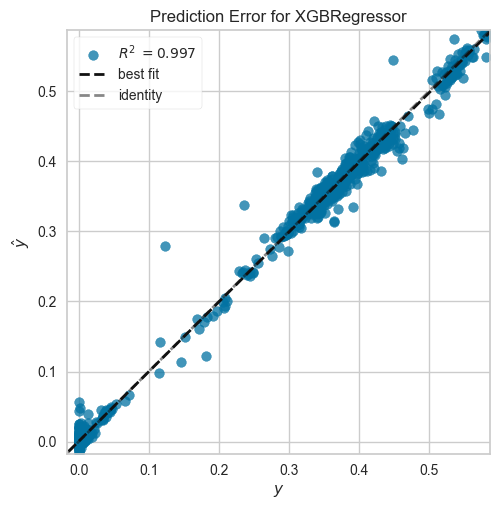

<Axes: title={'center': 'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [53]:
#Visualizing the XGB Regressor
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError


visualizer = PredictionError(pickled_model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

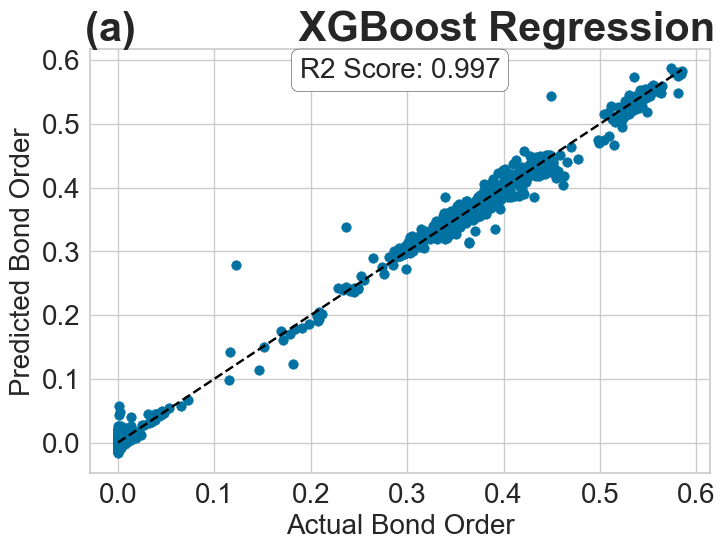

In [96]:
# Visualizing the XGB Regressor
#plt.annotate(f"R-squared: {r2:.3f}", (0.7, 0.8), fontsize=12)

#plt.rcParams['font.size'] = 40 

#fig, ax = plt.subplots()
#plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_grid_XG)
#ax.set_xticklabels(ax.get_xticks(), fontsize=10)
#ax.set_xticklabels(ax.get_yticks(), fontsize=14)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#ax.scatter(y_test, y_grid_dt, s=40)

plt.annotate(f'R2 Score: {r2:.3f}', xy=(min(y_test), max(y_grid_dt)), xytext=(0.5, 0.95), textcoords='axes fraction', ha='center', va='center', fontsize=20, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', label='Line of Best Fit')


plt.xlabel('Actual Bond Order', fontsize=20)
plt.ylabel('Predicted Bond Order', fontsize=20)
#plt.title('(a)                             XGBoost Regression', fontsize=18, weight='bold',ha='right')
plt.title('(a)              XGBoost Regression', fontsize=30, weight='bold')

plt.savefig("/Users/mateen/Desktop/AMIAA PODIUM/XG_WT.jpg" , dpi=800)
plt.show()

In [123]:
#Training the Ridge Regressor
from sklearn.linear_model import Ridge
ridge = Ridge()
param_grid = {
    'alpha': [0.1, 1, 10],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
pickle.dump(best_model, open('/Users/mateen/LR_wt.pkl', 'wb'))



In [105]:
# Loading the Ridge Regressor

pickled_model = pickle.load(open('/Users/mateen/LR_wt.pkl', 'rb'))
y_grid = pickled_model.predict(X_test)

/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtyp

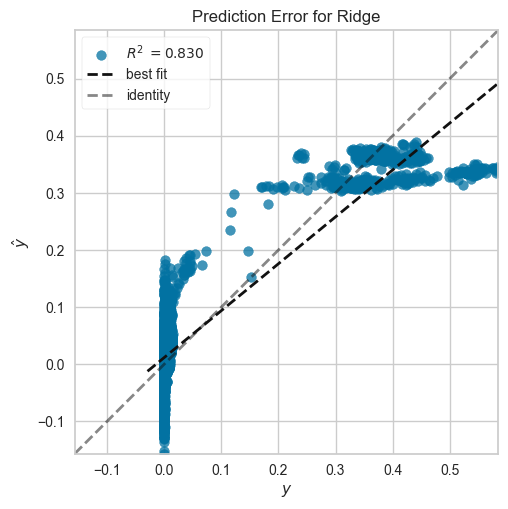

<Axes: title={'center': 'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [106]:
# Visualizing the Ridge Regressor
#from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError


visualizer = PredictionError(pickled_model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [107]:
#Evaluating the Ridge Regressor
true_mean = np.mean(y_test)
squared_error_num = np.sum(np.abs(y_test - y_grid))
squared_error_den = np.sum(np.abs(y_test - true_mean))
rae_loss = squared_error_num / squared_error_den

mse = mean_squared_error(y_test,y_grid)
mae = mean_absolute_error(y_test, y_grid)
r2 = r2_score(y_test, y_grid)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print(f"RAE: {rae_loss}")
print(f"RMSE: {rmse}")

Mean Squared Error: 0.004227388458276857
Mean Absolute Error: 0.04815725916082075
R-squared: 0.8304223539162457
RAE: 0.39218849951019236
RMSE: 0.06501837016010827


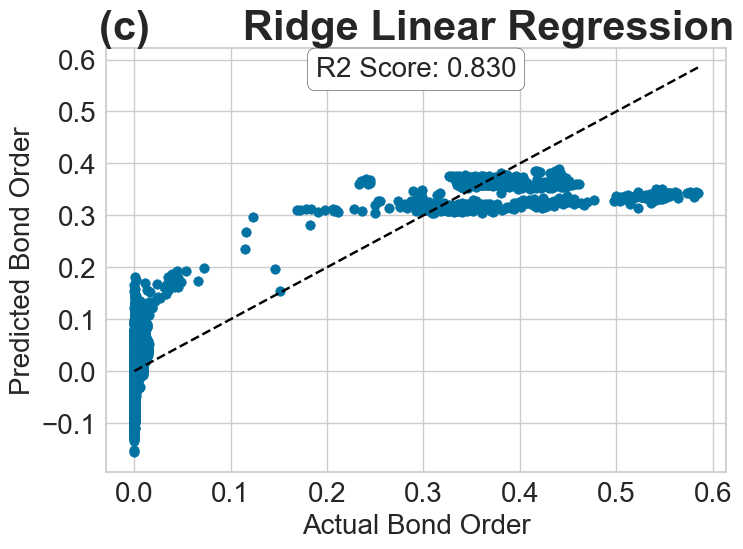

In [109]:
#Visualizing the Ridge Regressor
#plt.annotate(f"R-squared: {r2:.3f}", (0.7, 0.8), fontsize=12)

#plt.rcParams['font.size'] = 40 

#fig, ax = plt.subplots()
#plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_grid)
#ax.set_xticklabels(ax.get_xticks(), fontsize=10)
#ax.set_xticklabels(ax.get_yticks(), fontsize=14)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#ax.scatter(y_test, y_grid_dt, s=40)

plt.annotate(f'R2 Score: {r2:.3f}', xy=(min(y_test), max(y_grid_dt)), xytext=(0.5, 0.95), textcoords='axes fraction', ha='center', va='center', fontsize=20, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', label='Line of Best Fit')


plt.xlabel('Actual Bond Order', fontsize=20)
plt.ylabel('Predicted Bond Order', fontsize=20)
#plt.title('(c)    Actual vs. Predicted Values of the Ridge Linear Regression', fontsize=16, weight="bold")
plt.title('(c)        Ridge Linear Regression', fontsize=30, weight='bold')

plt.savefig("/Users/mateen/Desktop/AMIAA PODIUM/Ridge_WT.jpg" , dpi=800)
plt.show()

In [21]:
#Training the Lasso Regressor
from sklearn.linear_model import Lasso
lasso = Lasso()
param_grid = {
    'alpha': [0.1, 1, 10],
    'max_iter': [100, 500, 1000],
    'tol': [1e-3, 1e-4, 1e-5],
}
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
pickle.dump(best_model, open('/Users/mateen/LRlarso_wt.pkl', 'wb'))
y_grid = best_model.predict(X_test)
print(best_params)

{'alpha': 0.1, 'max_iter': 100, 'tol': 0.001}


In [110]:
#Loading the Lasso Regressor
pickled_model = pickle.load(open('/Users/mateen/LRlarso_wt.pkl', 'rb'))
y_grid = pickled_model.predict(X_test)

/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [111]:
#Evaluating the Lasso Regression
true_mean = np.mean(y_test)
squared_error_num = np.sum(np.abs(y_test - y_grid))
squared_error_den = np.sum(np.abs(y_test - true_mean))
rae_loss = squared_error_num / squared_error_den

mse = mean_squared_error(y_test,y_grid)
mae = mean_absolute_error(y_test, y_grid)
r2 = r2_score(y_test, y_grid)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print(f"RAE: {rae_loss}")
print(f"RMSE: {rmse}")

Mean Squared Error: 0.013922687883135743
Mean Absolute Error: 0.08548427613751632
R-squared: 0.4415046874250742
RAE: 0.6961764555189456
RMSE: 0.11799444005179117


/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mateen/Bond_Project/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtyp

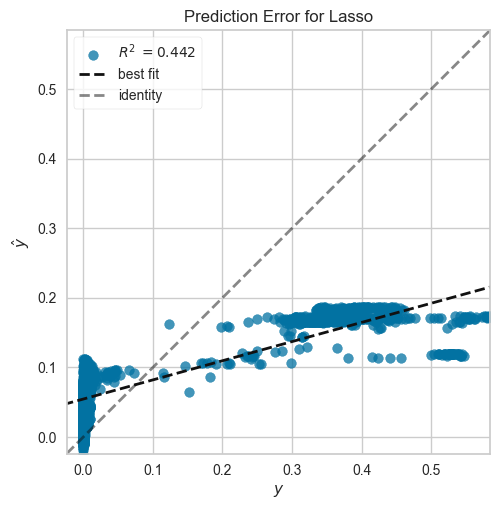

<Axes: title={'center': 'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [32]:
#Visualizing Lasso regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError


visualizer = PredictionError(pickled_model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

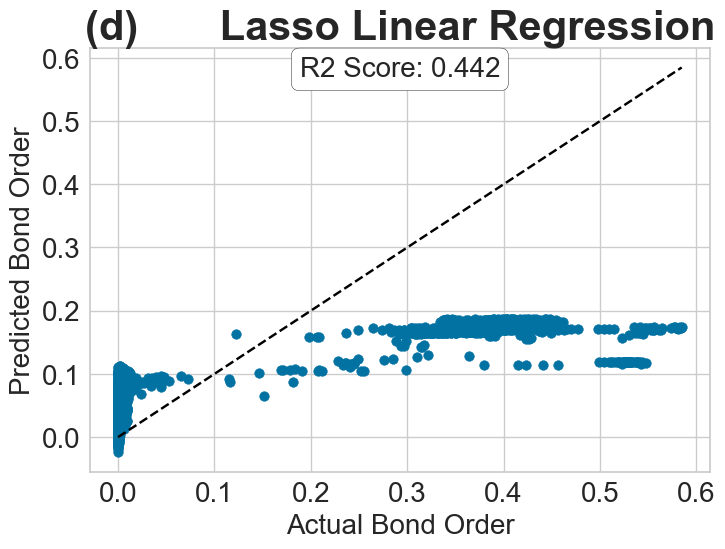

In [119]:
#Visualizing Lasso regression
#plt.annotate(f"R-squared: {r2:.3f}", (0.7, 0.8), fontsize=12)

#plt.rcParams['font.size'] = 40 

#fig, ax = plt.subplots()
#plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_grid)
#ax.set_xticklabels(ax.get_xticks(), fontsize=10)
#ax.set_xticklabels(ax.get_yticks(), fontsize=14)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#ax.scatter(y_test, y_grid_dt, s=40)

plt.annotate(f'R2 Score: {r2:.3f}', xy=(min(y_test), max(y_grid_dt)), xytext=(0.5, 0.95), textcoords='axes fraction', ha='center', va='center', fontsize=20, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', label='Line of Best Fit')


plt.xlabel('Actual Bond Order', fontsize=20)
plt.ylabel('Predicted Bond Order', fontsize=20)
#plt.title('(d)    Actual vs. Predicted Values of Lasso Linear Regression', fontsize=16, weight="bold")
plt.title('(d)       Lasso Linear Regression', fontsize=30, weight='bold')

plt.savefig("/Users/mateen/Desktop/AMIAA PODIUM/Larso_WT.jpg" , dpi=800)
plt.show()